

# Daftar Isi <a id='back'></a>

* [Final Project Analisis Data](#intro)
* [Pra-Pemrosesan Data](#1)
	* [Eksplorasi Data](#11)
	* [Nilai Kosong](#12)
		* [Kolom Description](#121)
		* [Kolom CustomerID](#122)
	* [Pengecekan Kolom Numerik](#13)
		* [Kolom UnitPrice](#131)
		* [Kolom Quantity](#132)
	* [Nilai Duplikat](#14)
	* [Perbaikan Data](#15)
* [Eksplorasi Data Analisis](#2)
	* [Pendapatan](#21)
	* [Mengidentifikasi Barang yang Banyak Dibeli](#22)
	* [Persebaran Penjualan 10 Barang Terlaris](#23)
	* [Mengidentifikasi Hari Ramai Pembelian](#24)
* [Pengujian Hipotesis](#3)
* [Kesimpulan](#4)
	
	


# Final Project Analisis Data <a id='intro'></a>

Pada project kali ini saya sebagai junior data analyst mendapatkan beberapa tugas untuk menganalisis variasi produk pada suatu toko, yang mana di project ini saya diminta menyelesaikan beberapa tugas antara lain :
1. Lakukan analisis data eksploratif
2. Analisis variasi produknya
3. Rumuskan dan lakukan pengujian hipotesis statistik

Dengan adanya permintaan tersebut saya akan menetapkan beberapa tujuan:
1. Melihat bagaimana grafik pendapatan perhari 
2. Bagaimana barang-barang terjual berdasarkan harinya
3. Mengidentifikasi barang-barang yang banyak dibeli 
4. Mengidentifikasi terhadap hari yang banyak pembelian
5. Menetapkan Hipotesis 
    (H0 : Rata-rata jumlah perbelanjaan di weekend sama dengan jumlah rata-rata pembelanjaan di weekday
    H1 : Rata-rata jumlah perbelanjaan di weekend tidak sama dengan jumlah rata-rata pembelanjaan di weekday)
    
pada project ini data yang dibutuhkan tersimpan pada ecommerce_dataset_us.csv yang berisikan data riwayat transaksi toko daring yang menjual perlengkapan rumah tangga. tidak terdapat keterangan tentang kualitas data dan bagaimana persebaran nilai di dataset ini, maka langkah yang selanjutnya dilakukan adalah meninjau data serta melakukan prapemrosesan data untuk melihat bagaimana kualitas dataset yang diberikan.

setelah melakukan prapemrosesan data barulah saya bisa melakukan analisis pada data dan memvisualisasikan data dengan library dari seaborn serta pada tahap akhir melakukan pengujian hipotesis statistik dengan menggunakan metode ttest

Presentasi: https://drive.google.com/file/d/1AjATLJCWlQnyJ2YI8Sbz58X-OzzEbWeE/view?usp=drive_link

dashboard: https://public.tableau.com/views/VariasiProduk/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

## Pra-pemrosesan Data <a id='1'></a>

In [325]:
# Mengimport library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

### Eksplorasi Data<a id='11'></a>

In [326]:
try:
    df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep="\t")
    
except:
    df = pd.read_csv('ecommerce_dataset_us.csv', sep="\t")
    
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


terdapat nilai kosong dibeberapa kolom dan juga kesalahan tipe data pada kolom invoice date

### Nilai Kosong <a id='12'></a>

In [328]:
df.isna().sum() / len(df) *100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
dtype: float64

pada kolom CustomerID data yang kosong lumayan besar yaitu sekitar 25% untuk sementara ini akan dibiarkan dahulu dan akan diperiksa lebih lanjut terkait persebarannya

#### Kolom description <a id='121'></a>

In [329]:
# Mendalami nilai kosong pada kolom Description
df[df['Description'].isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
1988,536550,85044,NaN,1,11/29/2018 14:34,0.0,NaN
2024,536552,20950,NaN,1,11/29/2018 14:34,0.0,NaN
2025,536553,37461,NaN,3,11/29/2018 14:35,0.0,NaN
2026,536554,84670,NaN,23,11/29/2018 14:35,0.0,NaN
2406,536589,21777,NaN,-10,11/29/2018 16:50,0.0,NaN


In [330]:
df[df['Description'].isna()].shape

(1454, 7)

sekilas terlihat bahwa setiap description yang kosong juga 0 pada unit price dan kosong pada CustomerID, tetapi saya akan mendalaminya lagi

In [331]:
# Memeriksa pola description yang kosong 
df[(df['Description'].isna()) & (df['UnitPrice'] == 0) & (df['CustomerID'].isna())].shape

(1454, 7)

setelah diperiksa memang benar pola tersebut, kita bisa menghapus baris tersebut

In [332]:
# Menghapus baris yang memiliki Description kosong
df.dropna(subset= ['Description'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 33.0+ MB


#### kolom customerID <a id='122'></a>

In [333]:
df[df.CustomerID.isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,11/29/2018 14:32,1.66,NaN


In [334]:
df[df.CustomerID.isna()].sort_values(by='Quantity', ascending= False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
220843,556231,85123A,?,4000,06/07/2019 15:04,0.00,NaN
263885,560040,23343,came coded as 20713,3100,07/12/2019 14:28,0.00,NaN
115807,546139,84988,?,3000,03/07/2019 16:35,0.00,NaN
447035,574941,22197,POPCORN HOLDER,1820,11/05/2019 17:42,1.95,NaN
160541,550460,47556B,did a credit and did not tick ret,1300,04/16/2019 13:18,0.00,NaN


In [335]:
df[df.CustomerID.isna()].sort_values(by='Quantity').head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
225530,556691,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.0,NaN
225529,556690,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.0,NaN
225528,556687,23003,Printing smudges/thrown away,-9058,06/12/2019 10:36,0.0,NaN
115818,546152,72140F,throw away,-5368,03/07/2019 17:25,0.0,NaN
431381,573596,79323W,"Unsaleable, destroyed.",-4830,10/29/2019 15:17,0.0,NaN


In [336]:
df[df.CustomerID.isna() & (df['Quantity'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
7313,537032,21275,?,-30,12/01/2018 16:50,0.00,NaN
11502,C537251,22429,ENAMEL MEASURING JUG CREAM,-2,12/04/2018 10:45,4.25,NaN
11503,C537251,22620,4 TRADITIONAL SPINNING TOPS,-8,12/04/2018 10:45,1.25,NaN
11504,C537251,21890,S/6 WOODEN SKITTLES IN COTTON BAG,-2,12/04/2018 10:45,2.95,NaN
11505,C537251,22564,ALPHABET STENCIL CRAFT,-5,12/04/2018 10:45,1.25,NaN
...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/05/2019 18:36,0.00,NaN
535335,581212,22578,lost,-1050,12/05/2019 18:38,0.00,NaN
535336,581213,22576,check,-30,12/05/2019 18:38,0.00,NaN
536908,581226,23090,missing,-338,12/06/2019 09:56,0.00,NaN


In [337]:
df[df.CustomerID.isna() & (df['Quantity'] <= 0) & (df['UnitPrice'] <= 0) ]['Description'].unique()

array(['?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'Amazon sold sets',
       'dotcom sold sets', 'wrongly sold sets', '? sold as sets?',
       '?sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 'crushed', 

setelah dilakukan penelusuran lebih dalam terkait nilai kosong pada CustomerID, sepertinya ada keterkaitan dengan kolom Quantity dan UnitPrice. Maka dengan adanya penemuan ini saya melakukan pengecekan pada kolom Quantity dan UnitPrice

### Pengecekan kolom numerik <a id='13'></a>

In [338]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


terdapat beberapa kejanggalan pada kolom numerik, antara lain:
1. Pada kolom quantity terdapat nilai minus dan sepertinya terdapat outlier pada kolom ini, dikarenakan nilai maksimal yang sangat jauh sekali dibandingkan nilai 75% data
2. Pada kolom UnitPrice juga terdapat nilai minus dan nilai maksimal yang sangat jauh sekali dibandingkan nilai 75% nya


#### Kolom UnitPrice<a id='131'></a>

In [339]:
# Pengecekan data yang minus pada kolom UnitPrice
df[df['UnitPrice'] < 0].sort_values(by='Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299983,A563186,B,Adjust bad debt,1,08/10/2019 14:51,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,08/10/2019 14:52,-11062.06,NaN


jika dilihat dari deskripsinya masuk akal jika ini bernilai minus, ttetapi untuk memudahkan analsis data ini akan dihilangkan

In [340]:
df.query('UnitPrice > 0', inplace=True)

In [341]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,406789.000000
mean,9.845904,4.673648,15287.795830
std,215.412652,94.614722,1713.573064
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: >

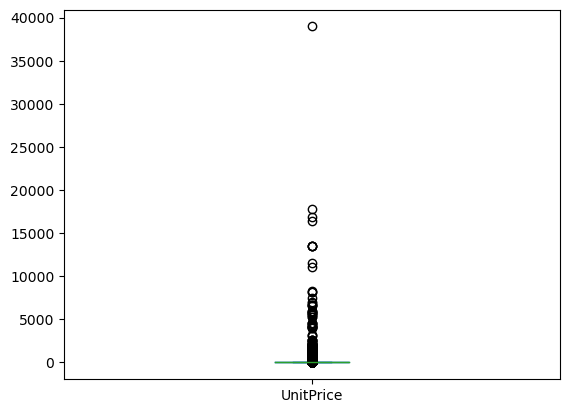

In [342]:
df.UnitPrice.plot(kind='box')
#plt.ylim(0,20)

terdapat outlier pada kolom unitprice

In [343]:
#melihat bagaimana nilai pada kolom unitprice yang bernilai diatas rata-rata
df[(df['UnitPrice'] > 4)].sort_values(by='UnitPrice', ascending= False).head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
222681,C556445,M,Manual,-1,06/08/2019 15:31,38970.00,15098.0
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/03/2019 11:36,17836.46,NaN
43702,C540117,AMAZONFEE,AMAZON FEE,-1,01/03/2019 09:55,16888.02,NaN
43703,C540118,AMAZONFEE,AMAZON FEE,-1,01/03/2019 09:57,16453.71,NaN
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/05/2018 15:04,13541.33,NaN
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/05/2018 15:49,13541.33,NaN
15017,537632,AMAZONFEE,AMAZON FEE,1,12/05/2018 15:08,13541.33,NaN
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/05/2018 15:34,13474.79,NaN
524601,C580604,AMAZONFEE,AMAZON FEE,-1,12/03/2019 11:35,11586.50,NaN
299982,A563185,B,Adjust bad debt,1,08/10/2019 14:50,11062.06,NaN


terdapat beberapa data pengeluaran yang bisa diidentifikasi dengan stockcodenya

In [344]:
# pengecekan stockcode berdasarkan kolom unitprice diatas 4 dan quantity dibawah atau sama dengna 0
df[(df['UnitPrice'] > 4) & (df['Quantity'] <= 0 )]['StockCode'].unique()


array(['D', '35004C', '22960', '22654', '22767', '22168', '22580',
       '22752', '22839', '21463', '22780', '85048', '22501', '21527',
       '85066', '21258', '21129', '22187', '21843', '22847', '22617',
       '35004B', '22832', '22942', '22689', '22776', '22854', '22788',
       '22184', '22761', '22769', '22762', '20685', '37449', '84840',
       '22429', '22943', '22940', '21349', '35400', '22636', '22423',
       '22371', '22430', '22926', '22927', '22849', 'POST', '22840',
       '21755', '85047', 'BANK CHARGES', 'S', '22968', '21622', '22061',
       '22169', 'M', 'AMAZONFEE', '21275', '85068', '90062', '16202E',
       '22357', '21730', '21812', '20703', '22627', '22220', '22784',
       '22138', '22193', '22180', '21624', '21485', '22192', '22634',
       '48188', '48187', '21533', '21217', '22139', '82486', '82483',
       '21906', '72807C', '84792', '22941', '21781', '21777', '22461',
       '21056', '82484', '22781', '22946', '22768', '22618', '22838',
       '22179', '8

menghapus baris dengan stock code 'D','BANK CHARGES','S','AMAZONFEE','C2','CRUK','POST','M'

In [345]:
df = df[~df["StockCode"].isin(('D','BANK CHARGES','S','AMAZONFEE','C2','CRUK','POST','M'))]
df.describe()


,Quantity,UnitPrice,CustomerID
count,537205.000000,537205.000000,404895.000000
mean,9.876701,3.685287,15295.205601
std,215.811905,22.878692,1710.382657
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,11062.060000,18287.000000


ternyata setelah data dibersihkan masih terdapat nilai yang sangat tinggi pada kolom unitprice, maka dengan ini saya akan melanjutkan pengecekan

In [346]:
df.sort_values(by='UnitPrice', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299982,A563185,B,Adjust bad debt,1,08/10/2019 14:50,11062.06,NaN
297723,562955,DOT,DOTCOM POSTAGE,1,08/09/2019 10:14,4505.17,NaN
493020,578149,DOT,DOTCOM POSTAGE,1,11/21/2019 11:11,2275.54,NaN
524892,580610,DOT,DOTCOM POSTAGE,1,12/03/2019 11:48,2196.67,NaN
525134,580612,DOT,DOTCOM POSTAGE,1,12/03/2019 11:58,2114.00,NaN
502058,578833,DOT,DOTCOM POSTAGE,1,11/23/2019 15:23,2028.25,NaN
431348,573585,DOT,DOTCOM POSTAGE,1,10/29/2019 14:41,2019.05,NaN
533491,581023,DOT,DOTCOM POSTAGE,1,12/05/2019 10:35,1861.46,NaN
541540,581498,DOT,DOTCOM POSTAGE,1,12/07/2019 10:26,1714.17,NaN
537254,581238,DOT,DOTCOM POSTAGE,1,12/06/2019 10:53,1683.75,NaN


masih terdapat tipe data pengeluaran dengan quantity yang tidak minus

In [347]:
# melihat stockcode yang bertipe pengeluaran di kolom unitprice dengan nilai diatas nilai standar
df[df['UnitPrice'] > 22]['StockCode'].unique()

array(['22827', '22803', '22605', '22760', '22769', '22847', 'DOT',
       '21258', '21761', '21340', '22503', '22946', '22947', '22761',
       '21769', '22655', '22504', '21361', '22423', '22839', '22838',
       '22424', '22762', '84968C', '84963A', '22830', '22833', '21359',
       '21627', '21632', '22282', '22461', '84078A', '84813', '22765',
       '22802', '22849', '85066', '22797', '20892', '21136', '22846',
       '84352', '84968F', '21686', '22828', '22526', '22824', '84968a',
       '84968e', '84968D', '84968E', '22826', '84816', '84968A', '22656',
       '84616', '22509', '22929', '21275', '85163B', '21628', '21331',
       'gift_0001_40', '21631', '22823', '22606', '22165', '22485',
       '84968f', '85161', 'gift_0001_50', 'gift_0001_30', '20785',
       '22782', '21763', '21781', '21135', '22848', '84796B', '84632',
       '21633', '22764', '22770', '84968d', '20748', '21332', '22783',
       '15058B', '23009', '23010', '23007', '23008', '15058C', '15058A',
       '2325

menghapus baris dengan stockcode 'DOT','gift_0001_40','gift_0001_50','gift_0001_30','B' yang merupakan bukan tipe penjualan

In [348]:
#'DOT','gift_0001_40','gift_0001_50','gift_0001_30'

df = df[~df["StockCode"].isin(('DOT','gift_0001_40','gift_0001_50','gift_0001_30','B'))]
df.describe()

,Quantity,UnitPrice,CustomerID
count,536483.000000,536483.000000,404879.000000
mean,9.888651,3.284348,15295.252992
std,215.956830,4.497464,1710.399838
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


In [349]:
df.sort_values(by='UnitPrice', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,06/08/2019 15:28,649.5,15098.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,06/08/2019 15:33,649.5,15098.0
87141,C543632,22655,VINTAGE RED KITCHEN CABINET,-1,02/08/2019 16:22,295.0,14842.0
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,02/02/2019 15:32,295.0,14842.0
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,01/08/2019 14:57,295.0,17406.0
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,05/24/2019 16:25,295.0,13015.0
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/14/2018 08:41,295.0,16607.0
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,03/23/2019 14:19,295.0,13452.0
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,03/12/2019 11:38,295.0,13452.0
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,04/26/2019 12:22,295.0,14973.0


kolom unitprice sudah bersih dari data-data yang bukan penjualan

#### Kolom Quantity <a id='132'></a>

In [350]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536483.000000,536483.000000,404879.000000
mean,9.888651,3.284348,15295.252992
std,215.956830,4.497464,1710.399838
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,649.500000,18287.000000


In [351]:
# Pengecekan data yang minus pada kolom Quantity 
df[df['Quantity'] < 0].sort_values(by='UnitPrice', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
87141,C543632,22655,VINTAGE RED KITCHEN CABINET,-1,02/08/2019 16:22,295.0,14842.0
36165,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,12/15/2018 15:11,295.0,16607.0
51674,C540652,22655,VINTAGE RED KITCHEN CABINET,-1,01/08/2019 15:04,265.5,17406.0
214674,C555599,22826,LOVE SEAT ANTIQUE WHITE METAL,-1,06/04/2019 10:59,195.0,17190.0
194248,C553564,22826,LOVE SEAT ANTIQUE WHITE METAL,-1,05/15/2019 17:43,195.0,17581.0
33105,C539224,22656,VINTAGE BLUE KITCHEN CABINET,-1,12/14/2018 13:01,175.0,17377.0
228908,C556966,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,-1,06/14/2019 09:55,165.0,13523.0
479082,C577131,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,-1,11/15/2019 20:01,165.0,15861.0
151308,C549549,22655,VINTAGE RED KITCHEN CABINET,-1,04/08/2019 11:37,125.0,16359.0
217099,C555889,22656,VINTAGE BLUE KITCHEN CABINET,-1,06/05/2019 16:01,125.0,13476.0


In [352]:
df[df['Quantity'] <= 0].sort_values(by='Quantity').shape

(8704, 7)

dikarenakan jumlahnya hanya sedikit dibandingkan dataframe asli dan tidak ada juga informasi terkait mengapa quantity menjadi minus dengan ini saya akan menghapus nilai baris dengan nilai quantity minus

In [353]:
df.query('Quantity > 0', inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,527779.000000,527779.000000,396340.000000
mean,10.567156,3.265709,15301.689070
std,155.831328,4.378261,1709.957487
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,11.000000,4.130000,16803.000000
max,80995.000000,649.500000,18287.000000


In [354]:
df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/07/2019 09:15,2.08,16446.0
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,01/16/2019 10:01,1.04,12346.0
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/25/2019 12:26,0.21,12901.0
206121,554868,22197,SMALL POPCORN HOLDER,4300,05/25/2019 10:52,0.72,13135.0
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,02/20/2019 10:43,0.82,18087.0
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,07/17/2019 17:04,0.06,14609.0
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,01/09/2019 12:55,2.10,15749.0
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,04/16/2019 13:20,2.10,15749.0
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,10/31/2019 11:24,0.32,16308.0
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,08/02/2019 18:06,1.45,12931.0


<Axes: >

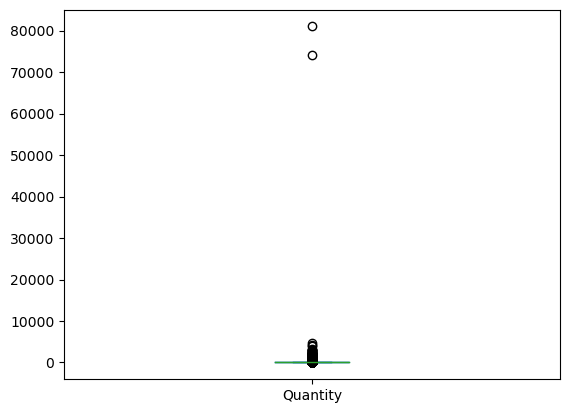

In [355]:
df.Quantity.plot(kind='box')


terdapat outlier sangat jauh pada kolom quantity, dengan ini saya menyimpulkan quantity diatas 10000 dihitung sebagai outlier

In [356]:
df.query('Quantity < 10000', inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,527777.000000,527777.000000,396338.00000
mean,10.273113,3.265715,15301.69364
std,37.732681,4.378268,1709.95439
min,1.000000,0.001000,12347.00000
25%,1.000000,1.250000,13975.00000
50%,3.000000,2.080000,15159.00000
75%,11.000000,4.130000,16803.00000
max,4800.000000,649.500000,18287.00000


### Nilai duplikat <a id='14'></a>

In [357]:
df.duplicated().sum()

5221

jumlahnya sangat sedikit, maka dengan ini nilai duplikat akan dihapus

In [358]:
df.drop_duplicates(inplace=True)

In [359]:
# Persentase dataframe setelah dibersihkan dibandingkan dataframe awal
len(df) / 541909

0.9642873619002452

setelah dibersihkan dari nilai duplikat dan data-data pengeluaran, data yang terbuang hanya sebesar 4%

### Perbaikan Data <a id='15'></a>

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522556 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    522556 non-null  object 
 1   StockCode    522556 non-null  object 
 2   Description  522556 non-null  object 
 3   Quantity     522556 non-null  int64  
 4   InvoiceDate  522556 non-null  object 
 5   UnitPrice    522556 non-null  float64
 6   CustomerID   391151 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 31.9+ MB


In [361]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [362]:
#mengubah nama kolom menjadi snackcase dan lowercase pada kolom description
df.rename(columns={"InvoiceNo": "invoice_no",
                   "StockCode": "stock_code",
                   "Description": "description",
                   "Quantity": "quantity",
                   "InvoiceDate": "invoice_date",
                   "UnitPrice": "unit_price",
                   "CustomerID": "customer_id"}, inplace=True)
df['description'] = df['description'].str.lower()

In [363]:
# Mengubah Tipe Data 
df['customer_id'] = df['customer_id'].astype('Int64')
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_no'] = df['invoice_no'].astype('Int64')

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522556 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    522556 non-null  Int64         
 1   stock_code    522556 non-null  object        
 2   description   522556 non-null  object        
 3   quantity      522556 non-null  int64         
 4   invoice_date  522556 non-null  datetime64[ns]
 5   unit_price    522556 non-null  float64       
 6   customer_id   391151 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 32.9+ MB


In [365]:
# Menambahkan kolom untuk total pembelanjaan
df['total_price'] = df['quantity'] * df['unit_price']

In [366]:
# Menambahkan kolom untuk Hari, Minggu dan Bulan pembelian
df['days'] = df['invoice_date'].dt.dayofweek
#df['weeks'] = df['InvoiceDate'].dt.isocalendar().week
df['month'] = df['invoice_date'].dt.month
df['datetime'] = df['invoice_date'].dt.date

In [367]:
df['datetime'].max()

datetime.date(2019, 12, 7)

In [368]:
df['datetime'].min()

datetime.date(2018, 11, 29)

setelah dilihat, data yang dimiliki memiliki rentang waktu sekitar 1 tahun

In [369]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price,days,month,datetime
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.30,3,11,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,22.00,3,11,2018-11-29
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29


## Eksplorasi Data Analisis <a id='2'></a>

### Pendapatan <a id='21'></a>

<Axes: title={'center': 'Grafik pendapatan perhari'}, xlabel='datetime'>

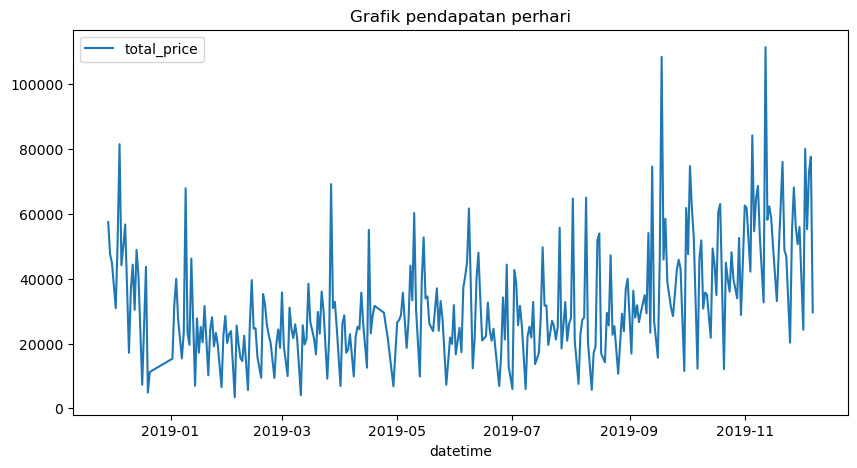

In [370]:
# Melihat pendapatan perhari

income_daily = df.pivot_table(
    index='datetime',
    values='total_price',
    aggfunc='sum')
income_daily.head()
income_daily.plot(kind='line', title='Grafik pendapatan perhari', figsize=(10,5))

walaupun tidak terlihat begitu jelas akan tetapi terlihat dibagian akhir grafiknya mengalami kenaikan dan ada hari hari yang mengalami kenaikan signifikan

<Axes: title={'center': 'Grafik pendapatan perbulan'}, xlabel='month'>

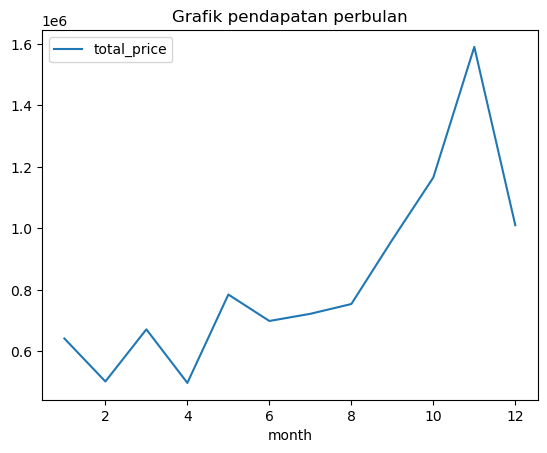

In [371]:
income_monthly = df.pivot_table(
    index='month',
    values='total_price',
    aggfunc='sum')
income_monthly.plot(kind='line', title='Grafik pendapatan perbulan')

seperti yang bisa dilihat bahwa pendapatan mengalami kenaikan pada saat akhir tahun terhitung mulai bulan 8

<Axes: title={'center': 'Grafik pendapatan berdasarkan hari'}, xlabel='days'>

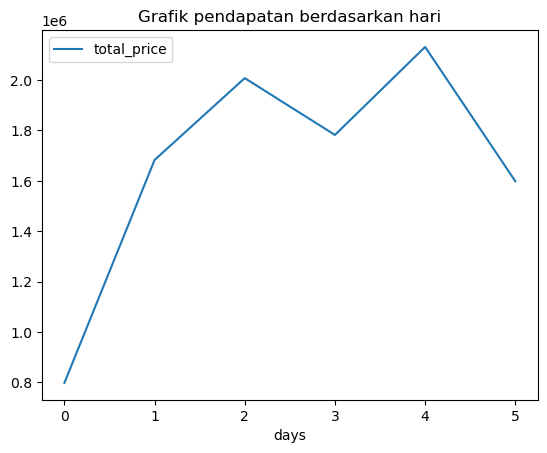

In [372]:
income_by_day = df.pivot_table(
    index='days',
    values='total_price',
    aggfunc='sum')
income_by_day.plot(kind='line', title='Grafik pendapatan berdasarkan hari')

jika dilihat grafik pendapatan berdasarkan hari, didapati bahwa hari rabu dan jumat adalah hari yang memiliki pendapatan tinggi dibandingkan hari yang lain secara keseluruhan

### Mengidentifikasi barang yang banyak dibeli <a id='22'></a>

In [373]:
goods_total = df.groupby(['description']).agg({'quantity':'sum'}).reset_index()\
                .sort_values(by='quantity',ascending=False)
goods_total.head(10)

,description,quantity
3923,world war 2 gliders asstd designs,54951
1808,jumbo bag red retrospot,48371
3833,white hanging heart t-light holder,37872
2672,popcorn holder,36749
2329,pack of 72 retrospot cake cases,36396
226,assorted colour bird ornament,36362
2731,rabbit night light,30739
2100,mini paint set vintage,26633
2295,pack of 12 london tissues,26119
2327,pack of 60 pink paisley cake cases,24820


world war 2 gliders asstd designs dan jumbo bag red retrospot adalah 2 barang dengan penjualan tertinggi dibandingkan dengan barang yang lain

###  Persebaran Penjualan 10 barang terlaris <a id='23'></a>

In [374]:
# membuat dataframe yang berisikan 10 barang dengan total penjualan teratas

goods_top10 = goods_total.head(10)['description'].unique()
goods_top10

array(['world war 2 gliders asstd designs', 'jumbo bag red retrospot',
       'white hanging heart t-light holder', 'popcorn holder',
       'pack of 72 retrospot cake cases', 'assorted colour bird ornament',
       'rabbit night light', 'mini paint set vintage ',
       'pack of 12 london tissues ', 'pack of 60 pink paisley cake cases'],
      dtype=object)

In [375]:
# dataframe bagaimana setiap barang terjual berdasarkan harinya
goods_daily = df.groupby(['description','days']).agg({'quantity':'sum'}).reset_index()
goods_daily.head()

,description,days,quantity
0,4 purple flock dinner candles,0,28
1,4 purple flock dinner candles,1,26
2,4 purple flock dinner candles,2,23
3,4 purple flock dinner candles,3,42
4,4 purple flock dinner candles,4,13


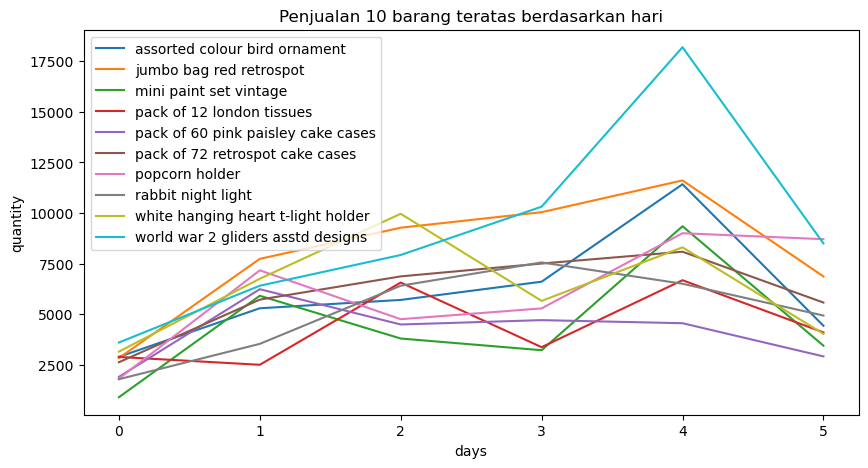

In [376]:
plt.figure(figsize=(10,5))
sns.lineplot(data=goods_daily[goods_daily["description"].isin(goods_top10)],
            x='days', y='quantity', hue='description')
plt.title('Penjualan 10 barang teratas berdasarkan hari')
plt.legend()
plt.show()

jika dilihat dari grafik berdasarkan hari, rata-rata barang mengalami kenaikan penjualan di hari jumat dan barang world war 2 gliders terjual sangat signifikan dibandingkan dengan barang lainnya

In [377]:
# dataframe bagaimana barang terjual berdasarkan bulannya
goods_monthly = df.groupby(['description','month']).agg({'quantity':'sum'}).reset_index()
goods_monthly.head()

,description,month,quantity
0,4 purple flock dinner candles,1,2
1,4 purple flock dinner candles,2,1
2,4 purple flock dinner candles,3,3
3,4 purple flock dinner candles,4,4
4,4 purple flock dinner candles,5,3


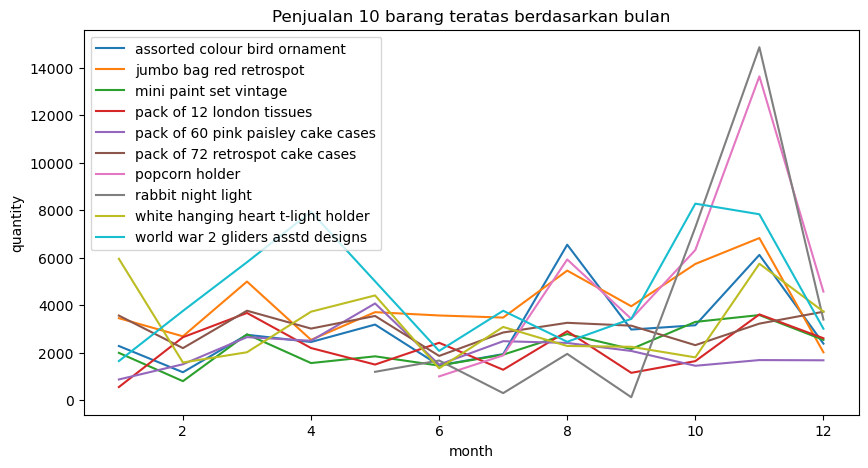

In [378]:
plt.figure(figsize=(10,5))
sns.lineplot(data=goods_monthly[goods_monthly["description"].isin((goods_top10))],
            x='month', y='quantity', hue='description')
plt.title('Penjualan 10 barang teratas berdasarkan bulan')
plt.legend()
plt.show()

jika dilihat penjualan berdasarkan bulan, bisa disimpulkan bahwa rabbit night light, popcorn holder dan world war 2 gliders adalah barang yang terjual berdasarkan trend.

langkah selanjutnya yang bisa diambil adalah dengan menambahkan stok rabbit night light dan popcorn holder diakhir tahun dan untuk world war 2 gliders di awal dan akhir tahun

### Mengidentifikasi hari yang ramai pembelian <a id='24'></a>

In [379]:
df_sales_daily = df.groupby(['month','days'])['invoice_no'].nunique().reset_index()
df_sales_daily

,month,days,invoice_no
0,1,0,124
1,1,1,204
2,1,2,262
3,1,3,253
4,1,4,184
...,...,...,...
67,12,1,359
68,12,2,339
69,12,3,310
70,12,4,374


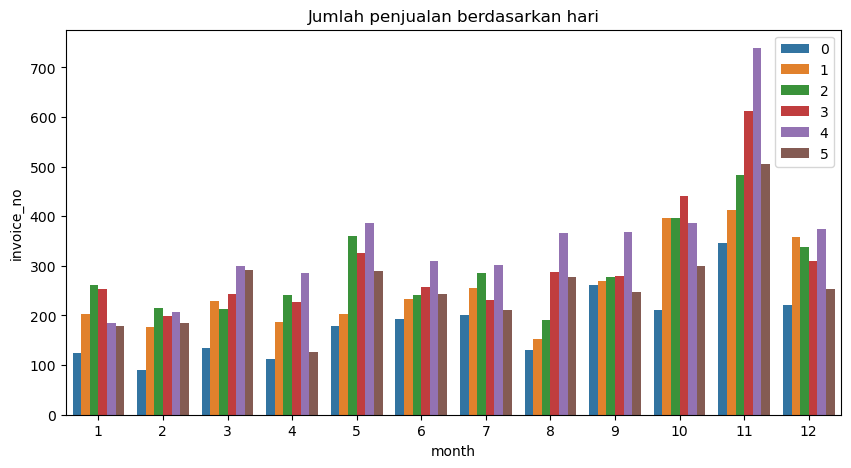

In [380]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sales_daily,
            x='month', y='invoice_no', hue='days')
plt.title('Jumlah penjualan berdasarkan hari')
plt.legend()
plt.show()

berdasarkan tabel diatas, secara keseluruhan hari kamis adalah hari dengan pembelian teramai. namun jika dilihat dari persebarannya, bulan 11 mengalami kenaikan jumlah penjualan secara pesat dibandingkan dengan bulan yang lain.

kemungkinan besar bulan 12 juga mengalami kenaikan penjualan akan tetapi dataset yang dipunya berakhir di awal bulan 12.

## Pengujian Hipotesis <a id='3'></a>

    H0 : Rata-rata jumlah perbelanjaan di weekend sama dengan jumlah rata-rata pembelanjaan di weekday
    H1 : Rata-rata jumlah perbelanjaan di weekend tidak sama dengan jumlah rata-rata pembelanjaan di weekday

In [381]:
# membuat dataframe yang memisahkan orang yang berbelanja di weekday dan weekend
# orang yang berbelanja di weekend adalah orang yang berbelanja di hari jumat dan sabtu
sale_weekday = df.query('days < 4')
sale_weekend = df.query('days >= 4')

In [382]:
sale_weekday.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price,days,month,datetime
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.30,3,11,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,22.00,3,11,2018-11-29
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,20.34,3,11,2018-11-29


In [383]:
sample_1 = sale_weekday.groupby('datetime')['invoice_no'].nunique().reset_index()['invoice_no']
sample_2 = sale_weekend.groupby('datetime')['invoice_no'].nunique().reset_index()['invoice_no']

print('rata-rata jumlah perbelanjaan di weekday:', sample_1.mean())
print('rata-rata jumlah perbelanjaan di weekend:', sample_2.mean())
print()

# Pengujian hipotesis statistik 2 sample
alpha = 0.05 
results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol, Rata-rata jumlah perbelanjaan di weekend tidak sama dengan jumlah rata-rata pembelanjaan di weekday")
else:
    print("tidak bisa menolak hipotesis nol, Rata-rata jumlah perbelanjaan di weekend sama dengan jumlah rata-rata pembelanjaan di weekday ")

rata-rata jumlah perbelanjaan di weekday: 61.65346534653465
rata-rata jumlah perbelanjaan di weekend: 71.03883495145631

p-value:  0.0019416715370879061
Kita menolak hipotesis nol, Rata-rata jumlah perbelanjaan di weekend tidak sama dengan jumlah rata-rata pembelanjaan di weekday


## Kesimpulan <a id='4'></a>

setelah melakukan analisis terhadap data yang dimiliki, data yang diberikan merangkap dengan data pengeluaran sehingga pada awal penelitian diharuskan menghapus tipe pengeluaran tersebut dan baru melanjutkan ke tahapan prapemrosesan data.

dengan waktu pengumpulan data dari 2018-11-29 s.d 2019-12-07 bisa disimpulkan bahwa:
   1. pendapatan mulai mengalami kenaikan pada akhir tahun, dimulai dari bulan ke 8
   2. hari jumat merupakan hari puncak dalam satu minggu, dimana di hari ini jumlah penjualan dan jumlah pendapatan tertinggi dibandingkan dengan hari yang lain
   3. dalam 10 barang yang paling banyak terjual, world war 2 gliders asstd designs dan jumbo bag red retrospot adalah 2 barang dengan penjualan tertinggi dibandingkan dengan barang yang lain
   4. jika dilihat dalam grafik penjualan 10 barang teratas, rabbit night light dan popcorn holder adalah barang yang terjual berdasarkan trend di akhir tahun
   5. setelah dilakukan uji hipotesis statistik didapati bahwa Rata-rata jumlah perbelanjaan di weekend tidak sama dengan jumlah rata-rata pembelanjaan di weekday